In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [5]:
manip = ExperimentClass.Experiment("20241029_NPQ_phaeo", "Fluo_liquide")
manip.annotations



,E,Cond
0,11,Pt1 - 1 (WT)
1,12,Pt1 - 3 (VDE KO)
2,13,Pt1 - 4 (VDE c4)
3,14,Pt2 - KO6
4,15,Pt2 - WT
5,16,Pt2 - LtpM
6,17,Pt1 - 6 (VDE c6)
7,18,Pt1 - 15 (VDE c16)
8,19,Pt1 - 16 (ZEP3 KO)
9,20,Pt1 - 11 (VDE c11)


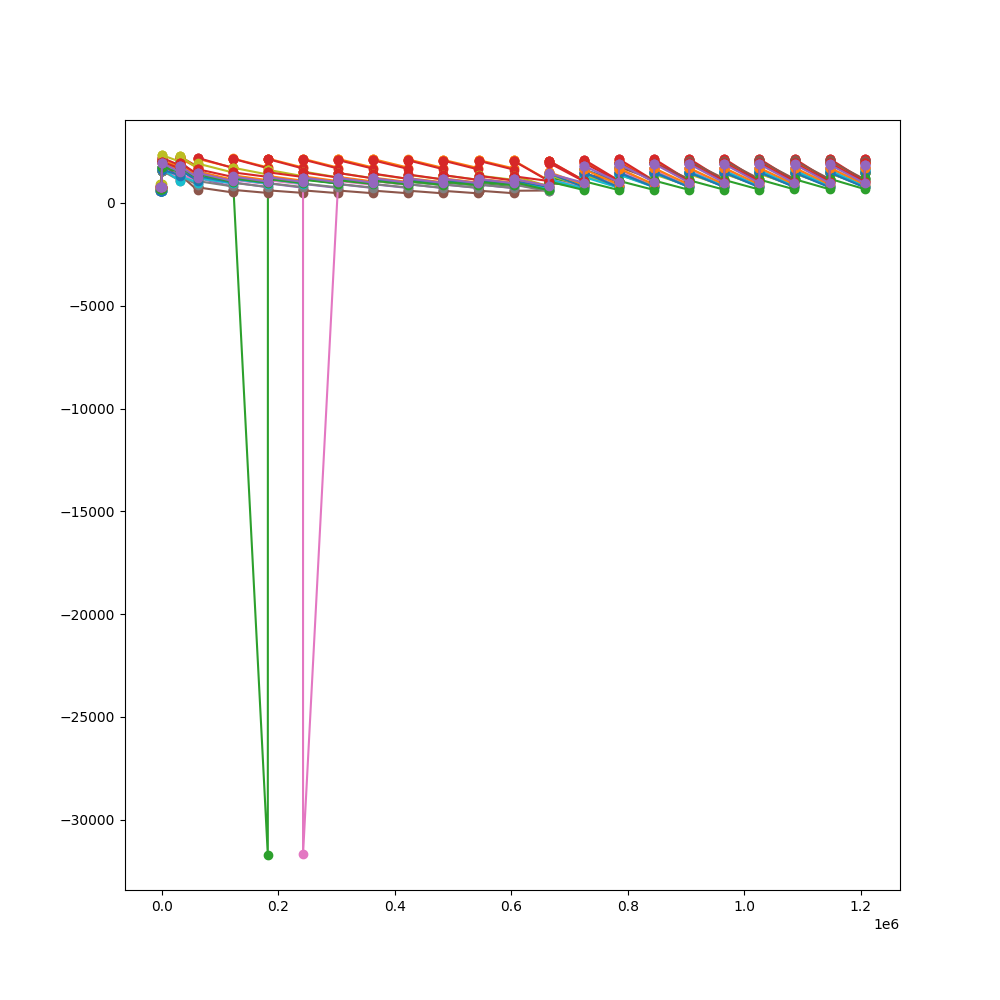

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for key in manip.Data.keys():
    ax.plot(manip.Time, manip.Data[key], 'o-', label=key)

In [7]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(np.mean(manip.Data[col][6:9]))
manip.Data = manip.Data.div(normalising_vector, axis=1)

In [8]:
def get_kinetics(time, data):
    time_Fstat = time[5::4]/(1000*60)
    Fstat = data[5::4]
    time_Fmax = time[6::4]/(1000*60)
    Fmax = data[6::4]
    return time_Fstat, Fstat, time_Fmax, Fmax


(0.0, 1.2)

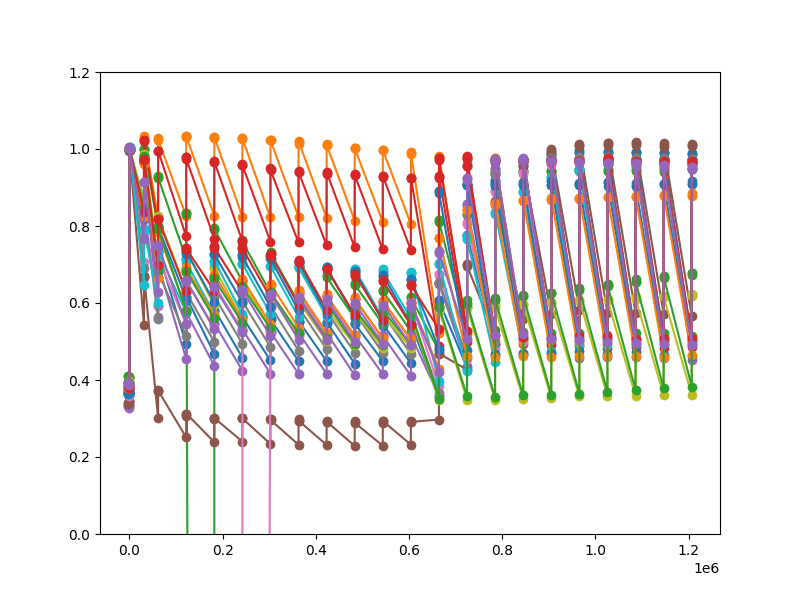

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
for key in manip.Data.keys():
    ax.plot(manip.Time, manip.Data[key], 'o-', label=key)
ax.set_ylim(0, 1.2)

In [10]:
time_Fstat= []
time_Fmax= []
Fstat= []
Fmax= []
Phi_PSII = []
NPQ = []
for record in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{record}"])
    time_Fstat.append(aux_time_Fstat.values)
    Fstat.append(aux_Fstat.values)
    time_Fmax.append(aux_time_Fmax.values)
    Fmax.append(aux_Fmax.values)
    Phi_PSII.append((Fmax[-1]-Fstat[-1])/Fmax[-1])
    NPQ.append((Fmax[-1][0]-Fmax[-1])/Fmax[-1])

time_Fstat = np.array(time_Fstat)
time_Fmax = np.array(time_Fmax)
Fstat = np.array(Fstat)
Fmax = np.array(Fmax)
Phi_PSII = np.array(Phi_PSII)
NPQ = np.array(NPQ)


In [11]:
manip.fig_folder

'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Fluo_liquide/20241029_NPQ_phaeo/Figures'

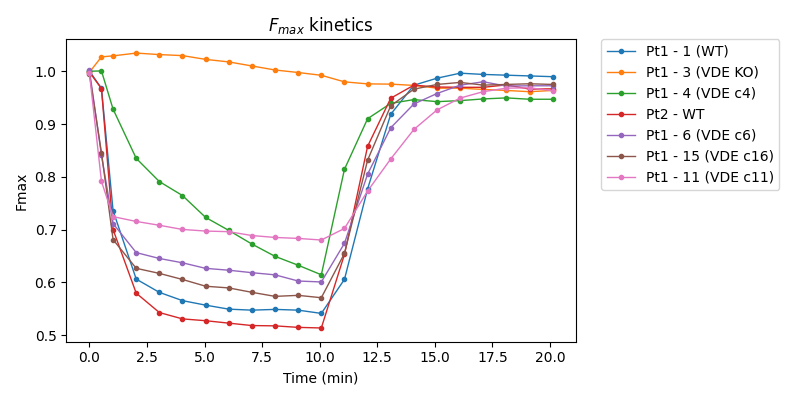

In [12]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    if "VDE" in manip.annotations.iloc[i].Cond or "WT" in manip.annotations.iloc[i].Cond:
        ax.plot(time_Fmax[i], Fmax[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("Fmax")
ax.set_title("$F_{max}$ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/Fmax_kinetics.png", dpi=300)

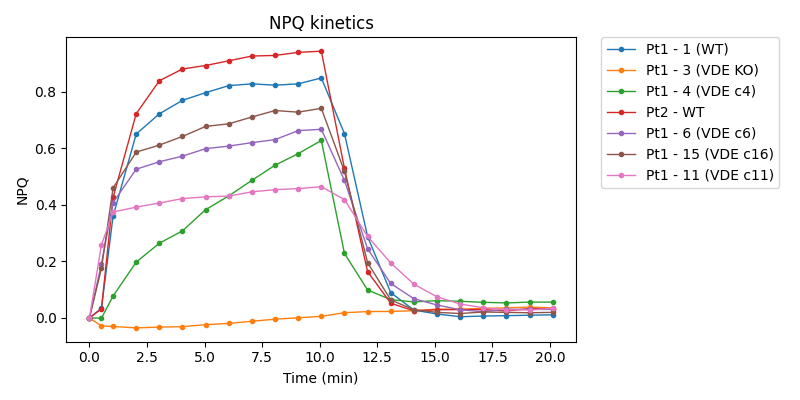

In [13]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    if "VDE" in manip.annotations.iloc[i].Cond or "WT" in manip.annotations.iloc[i].Cond:
        ax.plot(time_Fmax[i], NPQ[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("NPQ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/NPQ_kinetics.png", dpi=300)

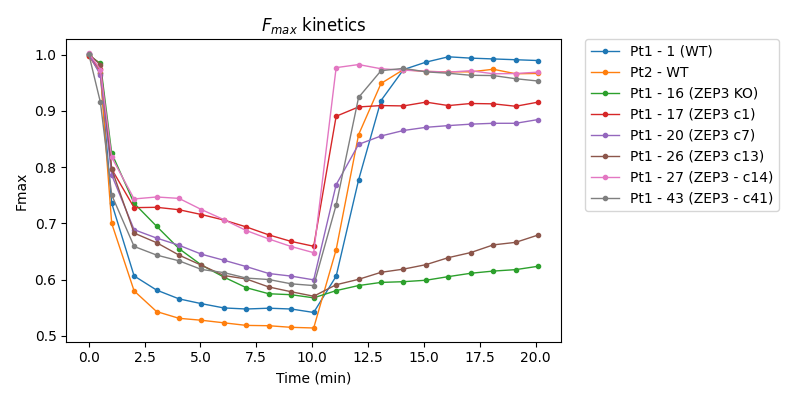

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    if "ZEP" in manip.annotations.iloc[i].Cond or "WT" in manip.annotations.iloc[i].Cond:
        ax.plot(time_Fmax[i], Fmax[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("Fmax")
ax.set_title("$F_{max}$ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/Fmax_kinetics.png", dpi=300)

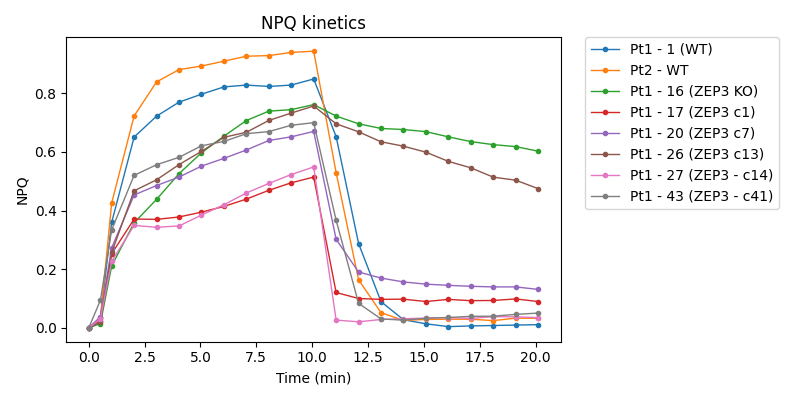

In [16]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    if "ZEP" in manip.annotations.iloc[i].Cond or "WT" in manip.annotations.iloc[i].Cond:
        ax.plot(time_Fmax[i], NPQ[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("NPQ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/NPQ_kinetics.png", dpi=300)

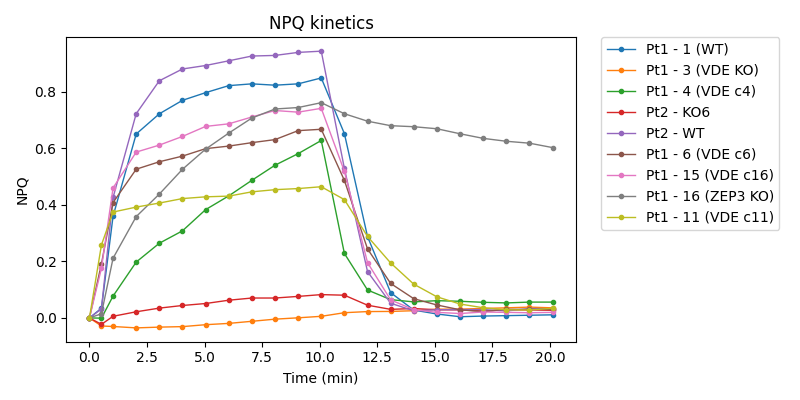

In [15]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    if "VDE" in manip.annotations.iloc[i].Cond or "WT" in manip.annotations.iloc[i].Cond or "KO" in manip.annotations.iloc[i].Cond:
        ax.plot(time_Fmax[i], NPQ[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("NPQ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/NPQ_kinetics.png", dpi=300)

NameError: name 'manip' is not defined

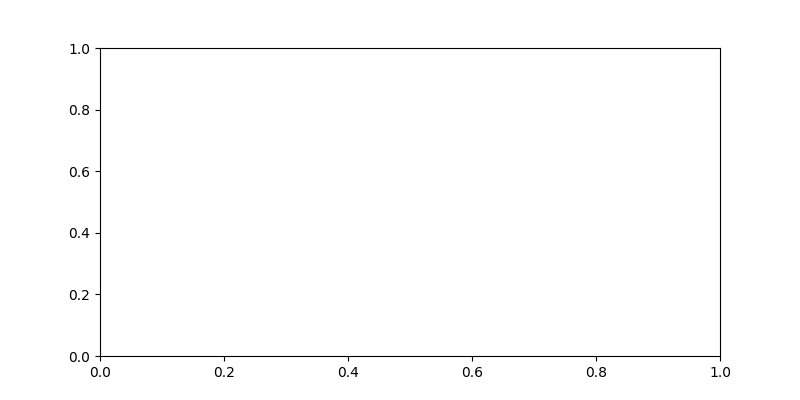

In [3]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    ax.plot(time_Fmax[i], Fmax[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("Fmax")
ax.set_title("$F_{max}$ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/Fmax_kinetics.png", dpi=300)

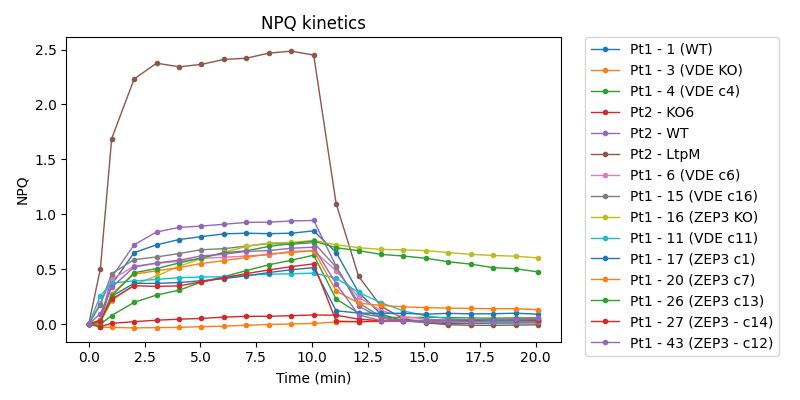

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for i, rec in enumerate(manip.annotations.E):
    ax.plot(time_Fmax[i], NPQ[i], 'o-', label = manip.annotations.iloc[i].Cond, markersize=3, linewidth=1)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("NPQ kinetics")

fig.tight_layout()

fig.savefig(manip.fig_folder + "/NPQ_kinetics.png", dpi=300)

In [ ]:
def light_bar(ax, time_vector, light_on, light_off, intensity):
    scale = ax.get_ylim()[1] - ax.get_ylim()[0]
    up = ax.get_ylim()[0]
    down = up - scale*0.06
    time = np.linspace(time_vector[0], time_vector[-1], 1000)
    ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
    ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))
    ax.axvline(light_on, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    ax.axvline(light_off, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    
    ax.text((light_off-light_on)/2, up - scale*0.035, f"{intensity} $µE m^{{-2}} s^{{-1}}$", horizontalalignment='center', verticalalignment='center', fontsize=11)
    #ax.text((light_off-light_on)/2, up - scale*0.035, "AL", horizontalalignment='center', verticalalignment='center', fontsize=11)

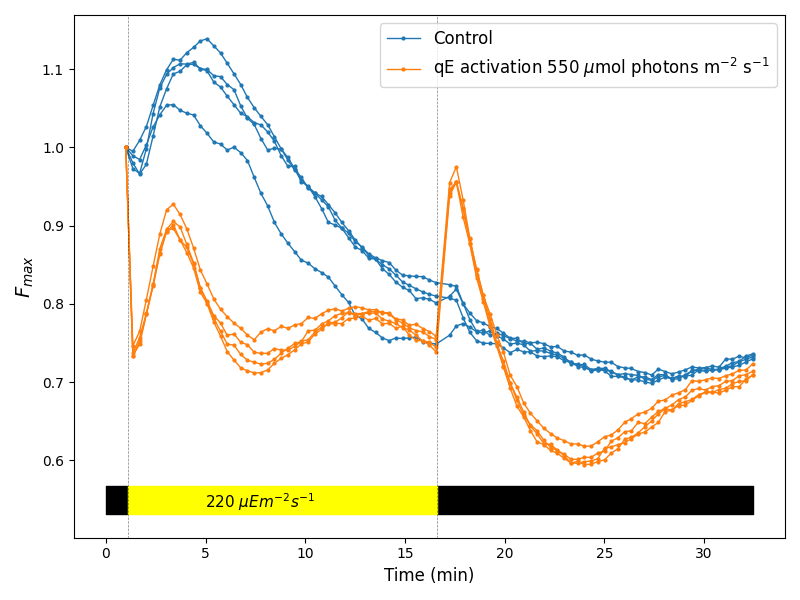

In [9]:
control = [11, 12, 13, 14]
qE = [21, 22, 23, 24]

marker = 2
line = 1

fig, ax = plt.subplots(figsize=(8, 6))
aux = 0
for i in control:
    index = list(manip.annotations.E).index(i)
    if aux == 0: 
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0", label= "Control")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0")

aux = 0    
for i in qE:
    index = list(manip.annotations.E).index(i)
    if aux == 0:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1", label= "qE activation 550 $\mu$mol photons m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1")
        

ax.legend(fontsize=12)
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.6, 220)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax.png", dpi=300)      

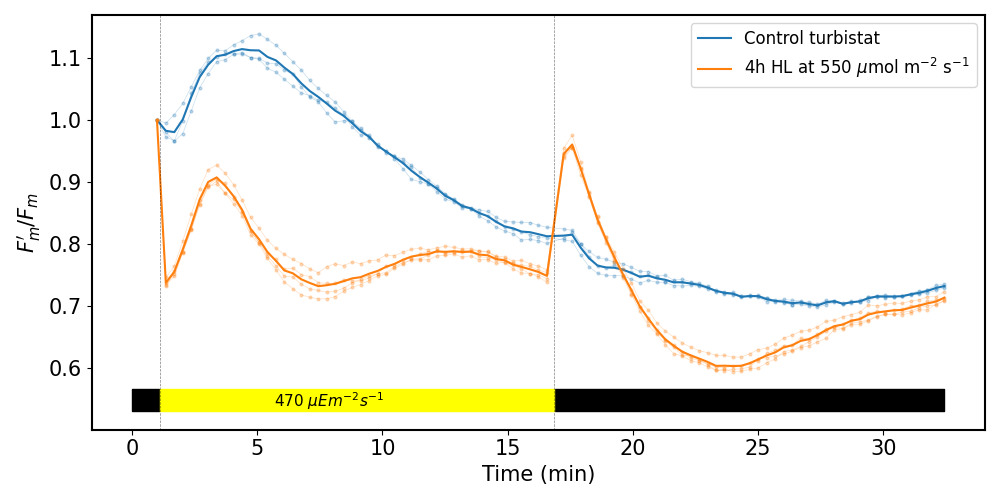

In [13]:
control =  [12, 13, 14]
qE = [21, 22, 23, 24]


marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(10, 5))
aux = 0
aux_y = []
for i in control:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "Control turbistat")
    

aux = 0
aux_y = []
for i in qE:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$")
    


ax.legend(fontsize=12, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)
ax = tools.poster_axes(ax, xlabel= "Time (min)", ylabel= "$F_m'/F_m$", title="", legendfontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 470)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax_comp_avg.png", dpi=300)   

In [66]:
def light_bar_2(ax, time_vector, light_on, light_off, intensity):
    scale = ax.get_ylim()[1] - ax.get_ylim()[0]
    up = ax.get_ylim()[0] + scale*0.1
    down = up - scale*0.06
    time = np.linspace(time_vector[0], time_vector[-1], 1000)
    ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
    ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))
    ax.axvline(light_on, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    ax.axvline(light_off, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    
    ax.text((light_off-light_on)/2, up - scale*0.035, f"{intensity} $µE m^{{-2}} s^{{-1}}$", horizontalalignment='center', verticalalignment='center', fontsize=11)

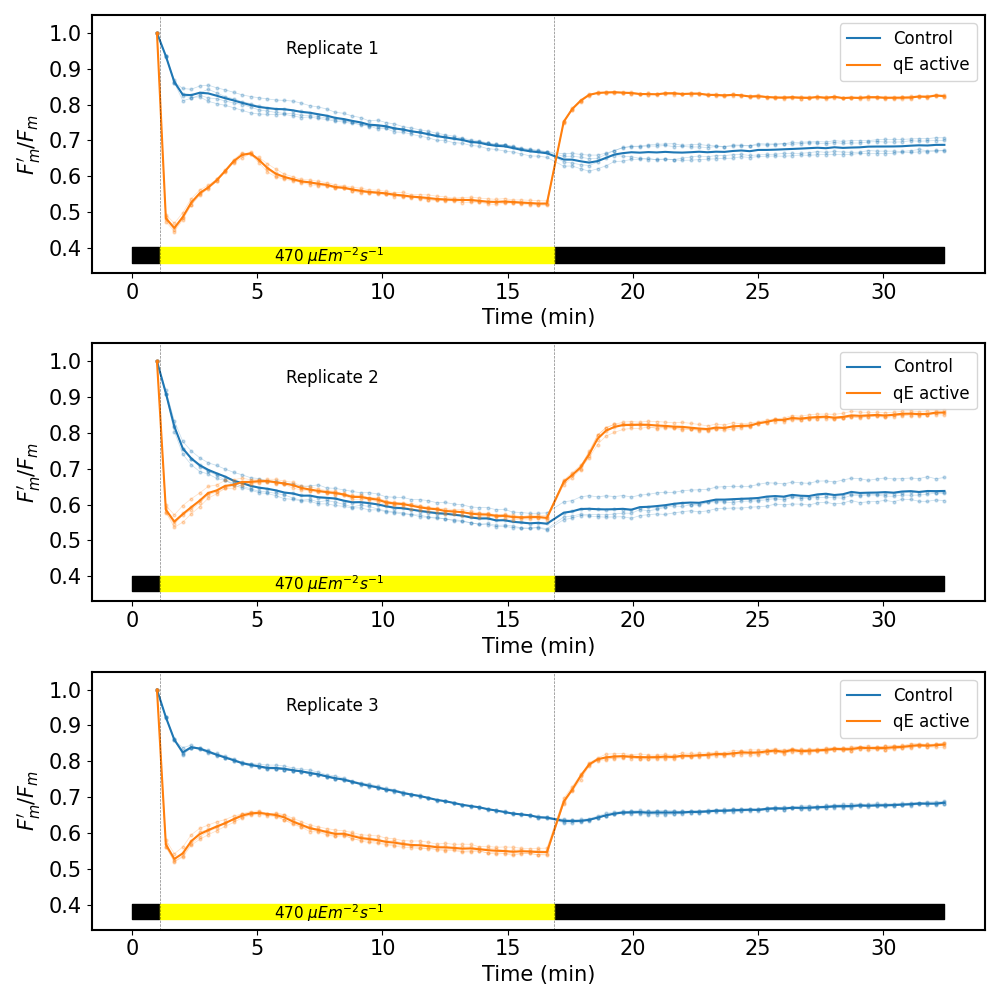

In [67]:
names = ["20240723_NPQ_stt71A6_bode", "20240724_NPQ_stt71A6_bode_2", "20240725_NPQ_stt71A6_bode_3"]

marker = 2
line = 1.5

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
for i, name in enumerate(names):
    manip = ExperimentClass.Experiment(name, "SpeedZen")
    normalising_vector = []
    for col in manip.Data.columns:
        normalising_vector.append(manip.Data[col][6])
    manip.Data = manip.Data.div(normalising_vector, axis=1)
    time_Fmax= []
    Fmax= []
    for record in manip.annotations.E:
        aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{record}"])
        time_Fmax.append(aux_time_Fmax.values)
        Fmax.append(aux_Fmax.values)
    time_Fmax = np.array(time_Fmax)
    Fmax = np.array(Fmax)
    
    aux = 0
    aux_y = []
    for j in control:
        index = list(manip.annotations.E).index(j)
        ax[i].plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
        aux_y.append(Fmax[index][1:])
    aux_y = np.array(aux_y)
    ax[i].plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "Control")
        

    aux = 0
    aux_y = []
    for j in qE:
        index = list(manip.annotations.E).index(j)
        ax[i].plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
        aux_y.append(Fmax[index][1:])
    aux_y = np.array(aux_y)
    ax[i].plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "qE active")
        


    ax[i].legend(fontsize=12, loc='upper right')
    ax[i].set_ylabel("$F_{max}$", fontsize=14)
    ax[i].set_xlabel("Time (min)", fontsize=12)
    ax[i] = tools.poster_axes(ax[i], xlabel= "Time (min)", ylabel= "$F_m'/F_m$", title="", legendfontsize=12)
    
    ax[i].set_ylim(0.33, 1.05)

    light_bar_2(ax[i], time_Fmax[i], 1.1, 16.86, 470)
    
    ax[i].text(6.15, 0.94, f"Replicate {i+1}", fontsize=12)
    


fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax_comp_avg_replicates.png", dpi=300)
    